<a href="https://colab.research.google.com/github/QoutiOussama13/Fake-news-detection/blob/main/pfe_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake news Detection : PFE**
By : Oussama QOUTI & El Mehdi DAOUDI


### **Fake News** has become one of the major problems in the existing society, it has a high potential to change opinions, facts and it can be the most dangerous weapon in influencing society. With the current usage of social media platforms, consumers are creating and sharing more information than ever before, some of which are misleading with no relevance to reality, so the public is unable to detect all these fake news.
### And that’s why we proposed this mobile application with a simple interface where you can past the news you found on a website or social media then test if it is real or fake. We used NLP techniques for preprocessing the corpus, and Logistic Regression model to predict if the news are fake or no. Also, we’ve done an experimental study on the datasets ‘True.csv’ and ‘Fake.csv’ and the accuracy was up to 98% in the testing. And finally, we launched our model in the mobile application using KivyMD.
### Keywords: **Fake news, Logistic regression, NLP, model, KivyMD**

# **Libreries**

In [1]:
# to Ignore the warnings in the code
import warnings
warnings.filterwarnings("ignore")

In [2]:
#installing kaggle
#!pip install kaggle

In [71]:
#installing wordcloud
#!pip install wordcloud

In [72]:
#installing nltk ( natural language toolkit):
#!pip install nltk

In [73]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from google.colab import files,drive
import zipfile
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,recall_score,precision_score,f1_score
from wordcloud import WordCloud, STOPWORDS
import pickle




nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Importing the data**

In [5]:
#connect the the file with google drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#files.upload()

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 93% 38.0M/41.0M [00:00<00:00, 99.2MB/s]
100% 41.0M/41.0M [00:00<00:00, 93.8MB/s]


In [16]:
!ls

drive  fake-and-real-news-dataset.zip  kaggle.json  sample_data


In [17]:
zip_ref = zipfile.ZipFile('fake-and-real-news-dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [18]:
df_f=pd.read_csv('/content/files/Fake.csv')
df_t=pd.read_csv('/content/files/True.csv')

In [19]:
df_t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Add new column class with two values (fake , true) in the dataframe



In [20]:
df_t["class"]="True"
df_f["class"]="False"

df_t.head(3)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True


Concatanete the two dataframes and shuffle the values:


In [21]:
df=df_t.append(df_f)

In [22]:
df = shuffle(df,random_state = 1)
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df

,title,text,subject,date,class
0,EPA chief says Paris climate agreement 'bad de...,WASHINGTON (Reuters) - The United States shoul...,politicsNews,"April 2, 2017",True
1,BREAKING NEWS: President Trump Announces Major...,President Trump just tweeted out a new policy ...,politics,"Jul 26, 2017",False
2,Trump says New Hampshire win not necessary to ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"February 7, 2016",True
3,Kremlin: U.S. sanctions aimed at turning busin...,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017",True
4,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,Kellyanne Conway s response to Williams criti...,left-news,"Dec 27, 2016",False
...,...,...,...,...,...
44893,THIS YEAR: Let’s Make Christmas Great Again…,"This year, let s try something a little differ...",US_News,"December 25, 2016",False
44894,DEMOCRATS SELL Promo T-Shirt: “Democrats give ...,"Yes, the Democrats think it s a good thing to ...",politics,"Apr 20, 2017",False
44895,White House aides told to preserve materials i...,WASHINGTON (Reuters) - The White House counsel...,politicsNews,"March 2, 2017",True
44896,'Congratulations': EU moves to Brexit phase tw...,BRUSSELS (Reuters) - The European Union agreed...,worldnews,"December 15, 2017",True


Check null values and delete unwanted columns

In [23]:
df.isnull().sum() 

title      0
text       0
subject    0
date       0
class      0
dtype: int64

# **Visualizing data**

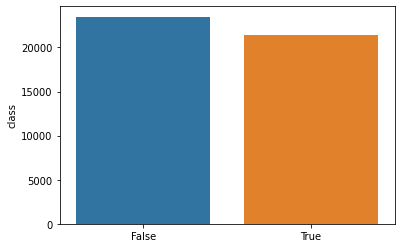

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x= df['class'].value_counts().index, y = df['class'].value_counts())
plt.show()

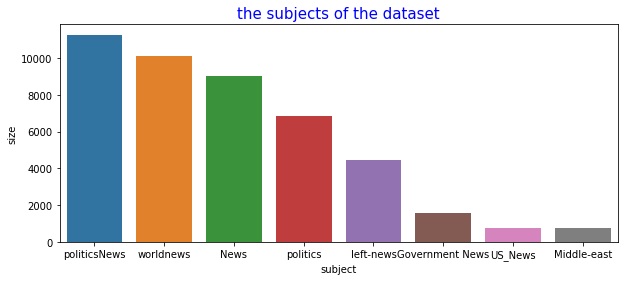

In [25]:
a = df['subject'].value_counts().index
b = df['subject'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=a,y=b)
plt.xlabel('subject')
plt.ylabel('size')
plt.title('the subjects of the dataset',{'color':'blue','size':15})
plt.show()


In [26]:
stopwords = set(STOPWORDS)
Keywords = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words= len(df["text"])
)

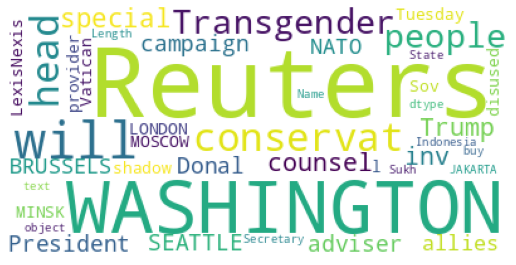

In [27]:
#keywords for the real news
Keywords.generate(str(df_t["text"]))
fig = plt.figure()
fig.set_figwidth(9) # set width
fig.set_figheight(8) # set height
plt.imshow(Keywords)
plt.axis('off')
plt.show()

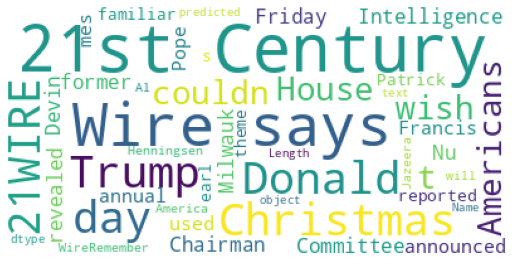

In [28]:
#keywords for the fake news
Keywords.generate(str(df_f["text"]))
fig = plt.figure()
fig.set_figwidth(9) # set width
fig.set_figheight(8) # set height
plt.imshow(Keywords)
plt.axis('off')
plt.show()

dropping unwanted features

In [29]:
X =df.drop(['title','subject','date','class'], axis=1) # feature left : text
#defining the target value
y=df['class']




#  Preprocessing :  
    - Lowering case of text data
    - Remove Puntuations
    - Remove extra spaces 
    - Remove special characters 
    - Remove stop-words
    - tokenizing
    - Stemming





In [30]:
y = y.replace(['True','False'],['0','1'])

# data cleaning function

In [31]:
# We used the variable beacause this punctuations “”‘’ are not in the string puntuation set
punctuation ='''!"#$%&'()*+,‘’-./”:;<=>?@[\“]^_`{|}~'''

def corpora_cleaning(text):
  stemmed = ''
  stop_words = set(stopwords.words('english'))
  #declaring this variable as PorterStemmer object
  porter = PorterStemmer()
  filtered = []
  #lowering and normilizing
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  text = re.sub(r'\<a href', ' ', text)
  text = re.sub(r'&amp;', '', text) 
  text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
  text = re.sub(r'<br />', ' ', text)
  text = re.sub(r'\'', ' ', text)
  text = text.lower()
  " ".join(text.split())
  #deleting punctuations
  text_p = "".join([char for char in text if char not in punctuation])
  #tokenizing
  words = word_tokenize(text_p)
  #this loop to delete the stop words
  for w in words:
    if w not in stop_words:
      filtered.append(w)
  #stemming 
  for word in filtered:
    stemmed += porter.stem(word)+ ' '
  return stemmed



In [34]:
%%time
Xf = X['text'].apply(corpora_cleaning)

CPU times: user 5min 18s, sys: 2.06 s, total: 5min 20s
Wall time: 5min 22s


In [35]:
print("Text before appliying the function :" ,df['text'][2000])
print("Text after appliying the function :" ,Xf[2000])

Text before appliying the function : HODEIDAH, Yemen (Reuters) - Smiling and sitting down to bread and milk with her family, Yemeni teenager Saida Ahmed Baghili is barely recognizable a year on from the photo of her emaciated frame that came to symbolize the country s humanitarian crisis. Baghili now weighs 36kg (80 lb), according to her father, more than triple the 11kg she weighed last October when Reuters first met her at the al-Thawra hospital in Sana a, where she was undergoing treatment for severe malnutrition. There the 19-year-old was unable to talk, let alone carry her ghostly, skeletal frame, which is now stronger after weeks of specialist care and time at home.  Saida s body got better because she s eating better, but she s still having trouble swallowing,  her father Ahmed Baghili said at their home in Hodeidah this month.  She can only eat milk, biscuits and juice.  Baghili s plight reflects that of many families in the Arabian Peninsula s poorest country, where a two-and-

In [36]:
tf_idf = TfidfVectorizer(use_idf=True)
#applying tf idf to training data
X_tf_idf = tf_idf.fit_transform(Xf)
print("Before TF-IDF : n_samples: %d, n_features: %d" % X.shape)

print("After TF-IDF : n_samples: %d, n_features: %d" % X_tf_idf.shape)


Before TF-IDF : n_samples: 44898, n_features: 1
After TF-IDF : n_samples: 44898, n_features: 85353


the top 10 most important terms (in terms of TF-IDF values)

In [37]:
df1 = pd.DataFrame(X_tf_idf[0].T.todense(), index=tf_idf.get_feature_names_out(), columns=["TF-IDF"])
df1 = df1.sort_values("TF-IDF",ascending=False)
print(df1.head(10))

             TF-IDF
agreement  0.340665
pruitt     0.290527
emiss      0.259787
climat     0.256083
chang      0.195312
pari       0.158446
chines     0.153193
fossil     0.145950
carbon     0.133753
china      0.130173


# **Models training and comparison**

Spliting our data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.33, random_state=42)

**Logistic Regression**

In [39]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7036
           1       0.99      0.99      0.99      7781

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



**Multinomial naive bayes**

In [40]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred2 = naive_bayes_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7036
           1       0.94      0.94      0.94      7781

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817



**Random Forest**

In [41]:
clf = RandomForestClassifier(max_depth=3, random_state=0,max_features='auto')
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7036
           1       0.88      0.99      0.93      7781

    accuracy                           0.92     14817
   macro avg       0.93      0.92      0.92     14817
weighted avg       0.93      0.92      0.92     14817



Comparing the classifiers 

In [42]:
classifiers = [LogisticRegression(), 
               RandomForestClassifier(max_depth=3, random_state=0,max_features='auto'), 
               MultinomialNB()]
for cls in classifiers:
    cls.fit(X_train, y_train)

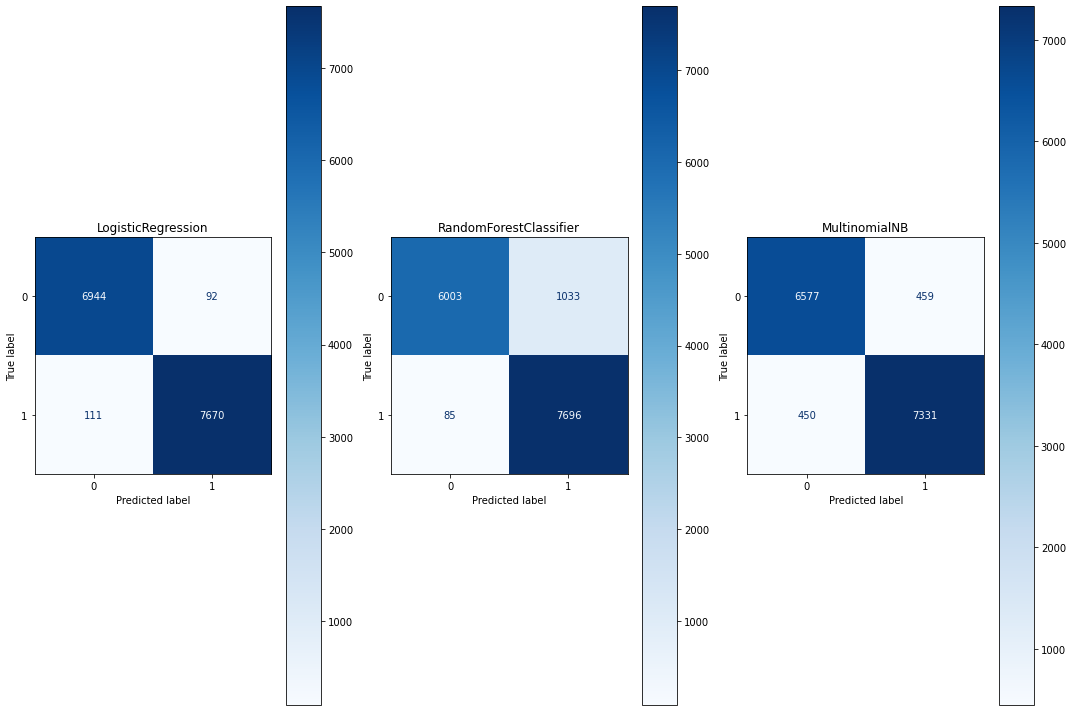

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    display = ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test, ax=ax, cmap='Blues')
    display.ax_.set_title(type(cls).__name__)

plt.tight_layout()  
plt.show()

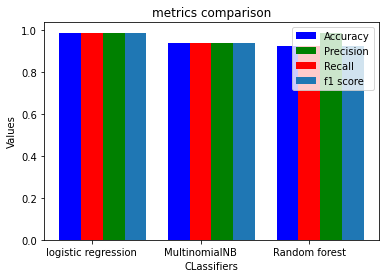

In [44]:
Xc = ['logistic regression','MultinomialNB','Random forest']
Accuracy = [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)]
Precision = [precision_score(y_test, y_pred, average='macro'),precision_score(y_test, y_pred2, average='macro'),precision_score(y_test, y_pred, average='macro')]
Recall = [recall_score(y_test, y_pred, average='macro'),recall_score(y_test, y_pred2, average='macro'),recall_score(y_test, y_pred3, average='macro')]
f1_score = [f1_score(y_test, y_pred, average='macro'),f1_score(y_test, y_pred2, average='macro'),f1_score(y_test, y_pred3, average='macro')]

X_axis = np.arange(len(Xc))
  
plt.bar(X_axis - 0.2, Accuracy,width = 0.2, label = 'Accuracy', color = 'b')
plt.bar(X_axis + 0.2, Precision,width = 0.2, label = 'Precision',color = 'green')
plt.bar(X_axis  , Recall,width =  0.2, label = 'Recall', color = 'red')
plt.bar(X_axis + 0.4, f1_score, width = 0.2, label = 'f1 score')
plt.xticks(X_axis, Xc)
plt.xlabel("CLassifiers")
plt.ylabel("Values")
plt.title("metrics comparison")
plt.legend()
plt.show()

Logistic regression algorithm showed a better performance according to most of the metrics so we are going to use it for our application

Testing our Model

In [45]:
def predict(sample):
  sample = corpora_cleaning(sample)
  test_input = tf_idf.transform(sample.split(','))
  if logisticRegr.predict(test_input) == '0':
    print('Real news with the probability of : ',logisticRegr.predict_proba(test_input)[0][0]*100,"%")
  else :
    print('Fake news with the probability of : ',logisticRegr.predict_proba(test_input)[0][1]*100,'%')
txt = '''russia's invasion of Ukraine has shone a spotlight on the expensive homes around the world that belong to billionaire Russians, many of whom are allies of Vladimir Putin.

On Monday, protesters in London climbed onto the balcony of a mansion in central London thought to belong to the energy tycoon Oleg Deripaska, who has been sanctioned by the UK government over the war in Ukraine.

The protesters said they were reclaiming the building for Ukrainian refugees who have fled their homes'''
predict(txt)

Real news with the probability of :  60.59238495079384 %


**Saving our Models (lr and TF-IDF)**

In [ ]:
# #saving the model
# with open('model_pkl', 'wb') as f:
#     pickle.dump(logisticRegr, f)

In [ ]:
# #SAVING TF-IDF
# with open('tf', 'wb') as f:
#     pickle.dump(tf_idf, f)

# After successfully creating our model we used it in a simple UI for a Mobile app using **Kivymd** 

The first screen with the description of our Work








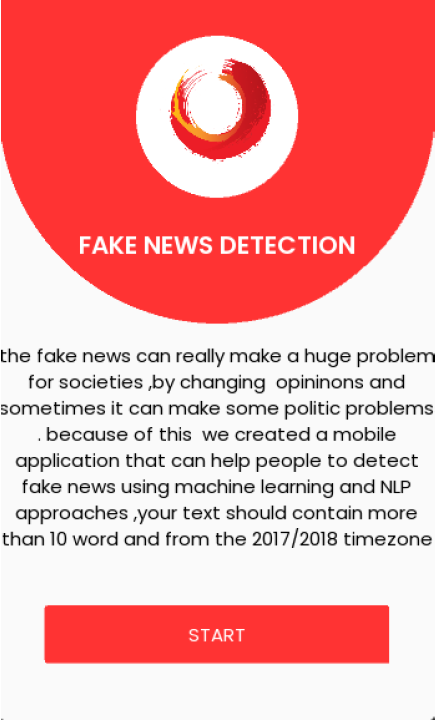

This second screen with the text field where you can add the news you want to check 

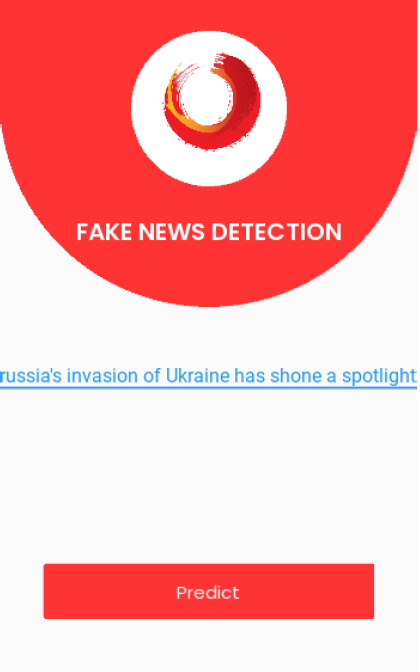

Finally the dialog box containing the prediction with the Probabilty

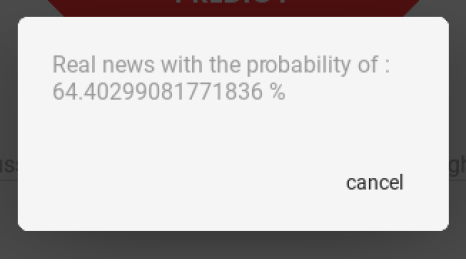